Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Magali"
COLLABORATORS = "NA"

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [101]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

# Finds which number of three inputs is in the middle
def median(x1, x2, x3): 
    # return 2nd number if it's bigger than the 1st and smaller than the 2nd or vice-versa
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    # return 3rd number if it's bigger than the second and smaller than the 1st or vice-versa
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    # return the 1st number, otherwise
    else:
        return x1

# Implements quicksort
def qsort(lst):
    # define the indices
    indices = [(0, len(lst))]
    # loop through array
    while indices:
        # check that the array is big enough for partition
        (frm, to) = indices.pop()
        # if the first index is as big as the last index (i.e. sublist is of length 0)
        # move on
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

# Calls qsort() on a list that is randomized
def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

# Tests the function randomized_quicksort()
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.052592382000057114


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

In Cormen et al., the pivot is chosen at random (and exchanged with the previously defined pivot).

Futhermore, Cormen et al.'s quicksort is recursive, while here it functions on a loop.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [99]:
import numpy as np
import time
import matplotlib.pyplot as plt

def practical_run_times_simulation(algo_name, full_name):
    # input_sizes = [0, 1, 4]
    input_sizes = [1, 4, 10, 50, 100, 250, 500, 750, 1000, 5000, 10000]
    ttl_test_times = np.empty(len(input_sizes))
    for i in range(0, 100):  # run a 100 simulations for each size
        test_arrays = create_input(input_sizes)
        test_times = run_time(test_arrays, algo_name)
        ttl_test_times = np.add(ttl_test_times, test_times)
    # print(ttl_test_times)
    avg_test_times = ttl_test_times / i 
    # print(avg_test_times)
    graph_run_time(input_sizes, ttl_test_times, full_name)

def create_input(sizes_arr):
    sample_arrays = []
    for i in range(0, len(sizes_arr)):
        sample_arrays.append(random.sample(range(0,10000), sizes_arr[i]))
    return(sample_arrays)

# Get run time for three-way merge
def run_time(input_arr, algo_to_test):
    """Tracks run time
    input_arr: a 2D array/list of lists that has lists of different sizes
    """
    record_times = []
    for i in range(0, len(input_arr)):
        start_time = time.time()
        algo_to_test(input_arr[i])
        time_elapsed = (time.time() - start_time)*1000
        record_times.append(time_elapsed)
    return(record_times)
# raise NotImplementedError()

def graph_run_time(input_size, run_time, algo_name_str):
    """Graphs the run time relative to input size
    
    input_size: a list of integers
    run_time: a list of floats (representing time in seconds), same size as list above
    algo_name: a string
    """
    plt.plot(input_size, run_time) # plot the two lists
    
    plt.ylabel("Running Time (milliseconds)") # add y-label
    plt.xlabel("Input Size") # add x-label
    
    title = "Practical Run Time of " + algo_name_str
    plt.title(title)

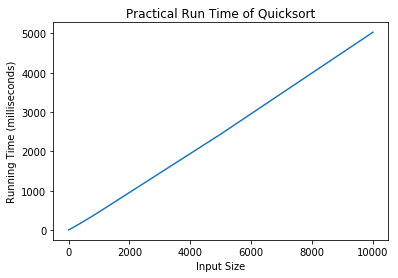

In [100]:
# Get run time for regular/two-way merge
practical_run_times_simulation(qsort, "Quicksort in Q3")

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [55]:
# Implements quicksort
def qsort(lst):
    # define the indices
    indices = [(0, len(lst))]
    # loop through array
    while indices:
        # check that the array is big enough for partition
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = 1

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # print(partition)
        # print(lower)
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        # print(upper)
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [56]:
qsort([4,2,1])

[1, 2, 4]

In [57]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

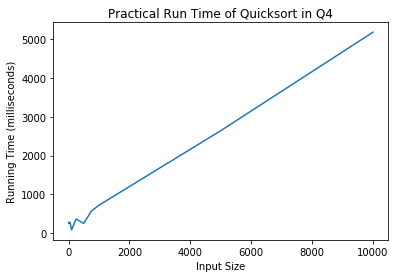

In [103]:
practical_run_times_simulation(qsort, "Quicksort in Q4")

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [104]:
def qsort(lst):
    # define the indices
    indices = [(0, len(lst))]
    # loop through array
    while indices:
        # check that the array is big enough for partition
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        partition = lst[frm]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = 1

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # print(partition)
        # print(lower)
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        # print(upper)
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [105]:
print(qsort([4,2,1]))

[1, 2, 4]


In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
practical_run_times_simulation(qsort, "Quicksort in Q5")

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Assumptions
- Each recursive call splits the list into 2 each time (lower and upper)
- A recursive call is made for each split
- So each recursive call creates 2 recursive calls: 2^x 
- We can only make 500 recursive calls in total before reducing the sublists to the base case of 1

Given the above, roughly 9 (8.96) of recursive calls are possible (log2(500) = x).  In other words, we can divide the (sub)list into the sublists 9 times, before we need to get to base case of 1. 

So the maximum size (n) of the list is given by 1 = (n/2)^8.96. 